In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import pandas as pd
from sklearn import model_selection, linear_model



In [2]:
#load data 
data = pd.read_csv('data/day.csv', sep=',', header=0,)
#convert to numpy array
data_array = np.array(data)
#data_array.shape

In [3]:
# # splitting training and testing data (features)
X = data_array[:,:-3]
# remove date column (second column)
X = np.delete(X, 1, 1) 
# splitting training and testing data (targer)
y_casual = data_array[:,-3]
y_registered = data_array[:,-2]
y_cnt = data_array[:,-1]

In [4]:
# split the data for training 
X_train, X_test, y_casual_train, y_casual_test = model_selection.train_test_split(X, y_casual, test_size=0.2)
y_casual_train = y_casual_train[:,np.newaxis]
y_casual_test = y_casual_test[:,np.newaxis]

print(X_train.shape, X_test.shape,y_casual_train.shape, y_casual_test.shape )

(584, 12) (147, 12) (584, 1) (147, 1)


In [5]:
# idk why but we need to change type even thou "type(y_casual)" output is the same before and after 
# but it fixes following error 
# ValueError: Unknown label type: 'unknown'
y_casual_train=y_casual_train.astype('int')
y_casual_test=y_casual_test.astype('int')


In [6]:
# Do linear regression to on all 
regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_casual_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#select the best feature based on coeficient
feature_column = np.argmax(regr.coef_)


In [9]:
# split the data to use just one feature with the highest coeficient
X_train =  X_train[:,feature_column]
X_test = X_test[:,feature_column]

X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [11]:
# now I will do regression just for one feature
regr = linear_model.LinearRegression()
# fit classifier 
regr.fit(X_train, y_casual_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# The coefficients and scores 
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_casual_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_casual_test))


Coefficients: [[ 2059.74839491]]
Residual sum of squares: 369597.16
Variance score: 0.26


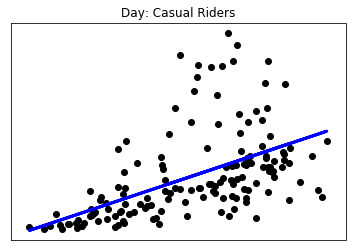

In [15]:
# visualize w/plot 

# Plot outputs
plt.scatter(X_test, y_casual_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.title('Day: Casual Riders')
plt.show()